In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from PIL import Image
from IPython.core.display import HTML
from functools import partial

In [2]:
%reload_ext autoreload
%autoreload 2
from engine.utils_nav import ProgramGenerator, ProgramInterpreter
from prompts.gqa import create_prompt

/home/ziliottf/anaconda3/envs/visprog/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:

from engine.step_interpreters_nav import parse_step

eval_ = """EVAL0=EVAL(expr="'STOP' if {LOC0} > 0 else 'NAVIGATE'")"""
stop = """STOP0=STOP(var=EVAL0)"""
# str_2 = """ANSWER2=EVAL(expr="'yes' if {ANSWER0} + {ANSWER1} > 0 else 'no'")"""
dict_ = parse_step(eval_, partial=False)
dict_

In [256]:
question = """ go to [0,5,3]"""
answer= """while not STOP0:
    NAV0=NAVIGATE(image=IMAGE,goal='[5,0,0]')
    LOC0=LOCATE(pos=NAV0)
    EVAL0=EVAL(expr="'STOP' if {LOC0} else 'NAVIGATE'")
    STOP0=STOP(var=EVAL0)
while not STOP1:
    NAV1=NAVIGATE(image=IMAGE,goal='[0,0,3]')
    LOC1=LOCATE(pos=NAV1)
    EVAL1=EVAL(expr="'STOP' if {LOC1} else 'NAVIGATE'")
    STOP1=STOP(var=EVAL1)
"""

image = Image.open('../assets/startnav.png')
image.thumbnail((640,640),Image.Resampling.LANCZOS)
init_state = dict(
    IMAGE=image.convert('RGB')
)

prompter = partial(create_prompt,method='all')
generator = ProgramGenerator(prompter=prompter, debug=True)

interpreter = ProgramInterpreter(dataset='pointnav')
prog,_ = generator.generate(dict(question=question), answer) #fake answer
print(prog)

Registering NAVIGATE step
Registering STOP step
Registering LOCATE step
Registering EVAL step
while not STOP0:
    NAV0=NAVIGATE(image=IMAGE,goal='[5,0,0]')
    LOC0=LOCATE(pos=NAV0)
    EVAL0=EVAL(expr="'STOP' if {LOC0} else 'NAVIGATE'")
    STOP0=STOP(var=EVAL0)
while not STOP1:
    NAV1=NAVIGATE(image=IMAGE,goal='[0,0,3]')
    LOC1=LOCATE(pos=NAV1)
    EVAL1=EVAL(expr="'STOP' if {LOC1} else 'NAVIGATE'")
    STOP1=STOP(var=EVAL1)


In [300]:
result, prog_state, html_str = interpreter.execute(prog,\
                                        init_state,\
                                        inspect=True)
result

-------------
| Trial n°1 |
-------------
NAVIGATE
LOCATE
EVAL
STOP
-------------
| Trial n°2 |
-------------
NAVIGATE
LOCATE
EVAL
STOP
-------------
| Trial n°1 |
-------------
NAVIGATE
LOCATE
EVAL
STOP
-------------
| Trial n°2 |
-------------
NAVIGATE
LOCATE
EVAL
STOP


True

Question:  go to [0,5,3]
Steps: 
 while not STOP0:
    NAV0=NAVIGATE(image=IMAGE,goal='[5,0,0]')
    LOC0=LOCATE(pos=NAV0)
    EVAL0=EVAL(expr="'STOP' if {LOC0} else 'NAVIGATE'")
    STOP0=STOP(var=EVAL0)
while not STOP1:
    NAV1=NAVIGATE(image=IMAGE,goal='[0,0,3]')
    LOC1=LOCATE(pos=NAV1)
    EVAL1=EVAL(expr="'STOP' if {LOC1} else 'NAVIGATE'")
    STOP1=STOP(var=EVAL1)




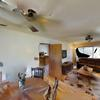
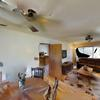
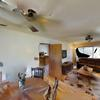
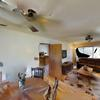

In [301]:
print('Question:',question)
print('Steps: \n',answer)
HTML(html_str)